In [738]:
# Project: Predicting the moives revenue for a dataset scraped from the movieDB website
# Names: Rawan Alahmadi, Morooj Aldeeb
# Date: 10/14/2021

In [226]:
import sklearn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

In [227]:
movie_df = pd.read_pickle(r"C:\Users\rawan\Desktop\project2\MyMovies_clean.pkl")

In [228]:
movie_df.head()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue
0,Venom: Let There Be Carnage,580489,9/30/2021,97,2.0,"Science Fiction,Action",72.0,9.0,English,110000000.0,191000000.0
1,Free Guy,550988,8/11/2021,115,4.0,"Comedy,Action,Adventure,Science Fiction",78.0,10.0,English,110000000.0,324000000.0
2,Venom,335983,9/28/2018,112,2.0,"Science Fiction,Action",68.0,13.0,English,116000000.0,855013954.0
4,Snake Eyes: G.I. Joe Origins,568620,7/22/2021,121,2.0,"Action,Adventure",69.0,13.0,English,88000000.0,36964325.0
9,The Last Warrior: Root of Evil,589754,1/1/2021,120,3.0,"Fantasy,Adventure,Comedy",71.0,2.0,Russian,8400000.0,27658331.0


In [229]:
movie_df.shape

(1871, 11)

In [230]:
movie_df.tail()

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue
3610,Transformers,1858,6/27/2007,144,3.0,"Adventure,Science Fiction,Action",67.0,9.0,English,150000000.0,709709780.0
3614,A Few Good Men,881,12/11/1992,138,1.0,Drama,75.0,21.0,English,40000000.0,243240178.0
3615,Pitch Perfect 3,353616,12/20/2017,93,2.0,"Comedy,Music",66.0,4.0,English,45000000.0,184724494.0
3617,Safe,72387,4/16/2012,94,3.0,"Action,Crime,Thriller",65.0,3.0,English,30000000.0,40346186.0
3619,The Thin Red Line,8741,3/5/1998,171,3.0,"Drama,History,War",75.0,25.0,English,52000000.0,98126565.0


In [231]:
movie_df.sample(5)

,title,id,release_date,duration,genre_count,genre,rating,keywords,language,budget,revenue
625,Taken 2,82675,9/27/2012,91,3.0,"Action,Crime,Thriller",63.0,10.0,English,45000000.0,376141306.0
151,Harry Potter and the Chamber of Secrets,672,11/13/2002,161,2.0,"Adventure,Fantasy",77.0,14.0,English,100000000.0,876688482.0
630,No Strings Attached,41630,1/21/2011,107,2.0,"Comedy,Romance",63.0,13.0,English,25000000.0,149228077.0
798,Total Recall,64635,8/2/2012,121,4.0,"Action,Science Fiction,Adventure,Thriller",60.0,15.0,English,125000000.0,198802074.0
11,Shang-Chi and the Legend of the Ten Rings,566525,9/1/2021,132,3.0,"Action,Adventure,Fantasy",78.0,6.0,English,150000000.0,401000000.0


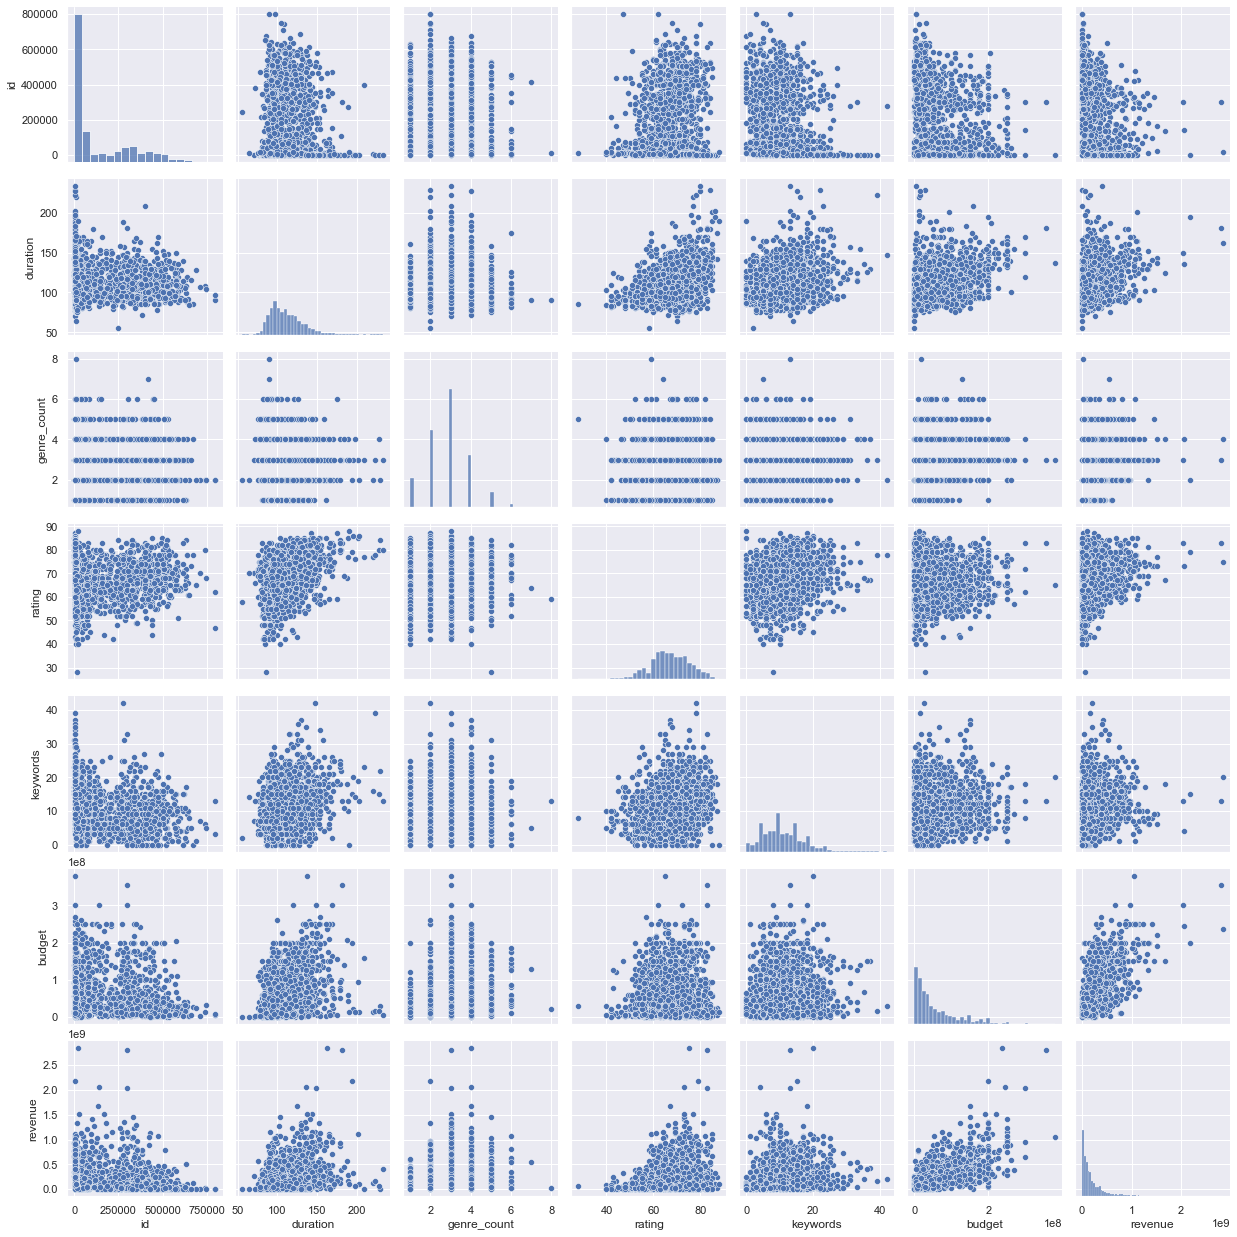

In [747]:
sns.pairplot(movie_df)

In [748]:
#Gettting th dummies columns from the genre column

genere_df= movie_df['genre'].str.get_dummies(sep=',')
genere_df.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [232]:
# Dropping the genre column from the original df

movie_df = movie_df.drop('genre',axis = 1)

In [233]:
# Joining the dummies values to our original df

movie_df = movie_df.join(genere_df)
movie_df.head()

,title,id,release_date,duration,genre_count,rating,keywords,language,budget,revenue,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Venom: Let There Be Carnage,580489,9/30/2021,97,2.0,72.0,9.0,English,110000000.0,191000000.0,...,0,0,0,0,0,1,0,0,0,0
1,Free Guy,550988,8/11/2021,115,4.0,78.0,10.0,English,110000000.0,324000000.0,...,0,0,0,0,0,1,0,0,0,0
2,Venom,335983,9/28/2018,112,2.0,68.0,13.0,English,116000000.0,855013954.0,...,0,0,0,0,0,1,0,0,0,0
4,Snake Eyes: G.I. Joe Origins,568620,7/22/2021,121,2.0,69.0,13.0,English,88000000.0,36964325.0,...,0,0,0,0,0,0,0,0,0,0
9,The Last Warrior: Root of Evil,589754,1/1/2021,120,3.0,71.0,2.0,Russian,8400000.0,27658331.0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Getting dummies valribles from the column language and divinig the columns to English & lang_others
'''
languages = movie_df['language'].str.get_dummies(sep=',')
movie_df = movie_df.join(languages['English'])
languages.drop('English',axis=1,inplace=True)
languages['lang_others'] = languages.sum(axis=1)
movie_df = movie_df.join(languages['lang_others'])
movie_df.drop('language',axis=1,inplace=True)
movie_df.head()

'''
# Adding the dummies for the language column made the score worse

"\nlanguages = movie_df['language'].str.get_dummies(sep=',')\nmovie_df = movie_df.join(languages['English'])\nlanguages.drop('English',axis=1,inplace=True)\nlanguages['lang_others'] = languages.sum(axis=1)\nmovie_df = movie_df.join(languages['lang_others'])\nmovie_df.drop('language',axis=1,inplace=True)\nmovie_df.head()\n\n"

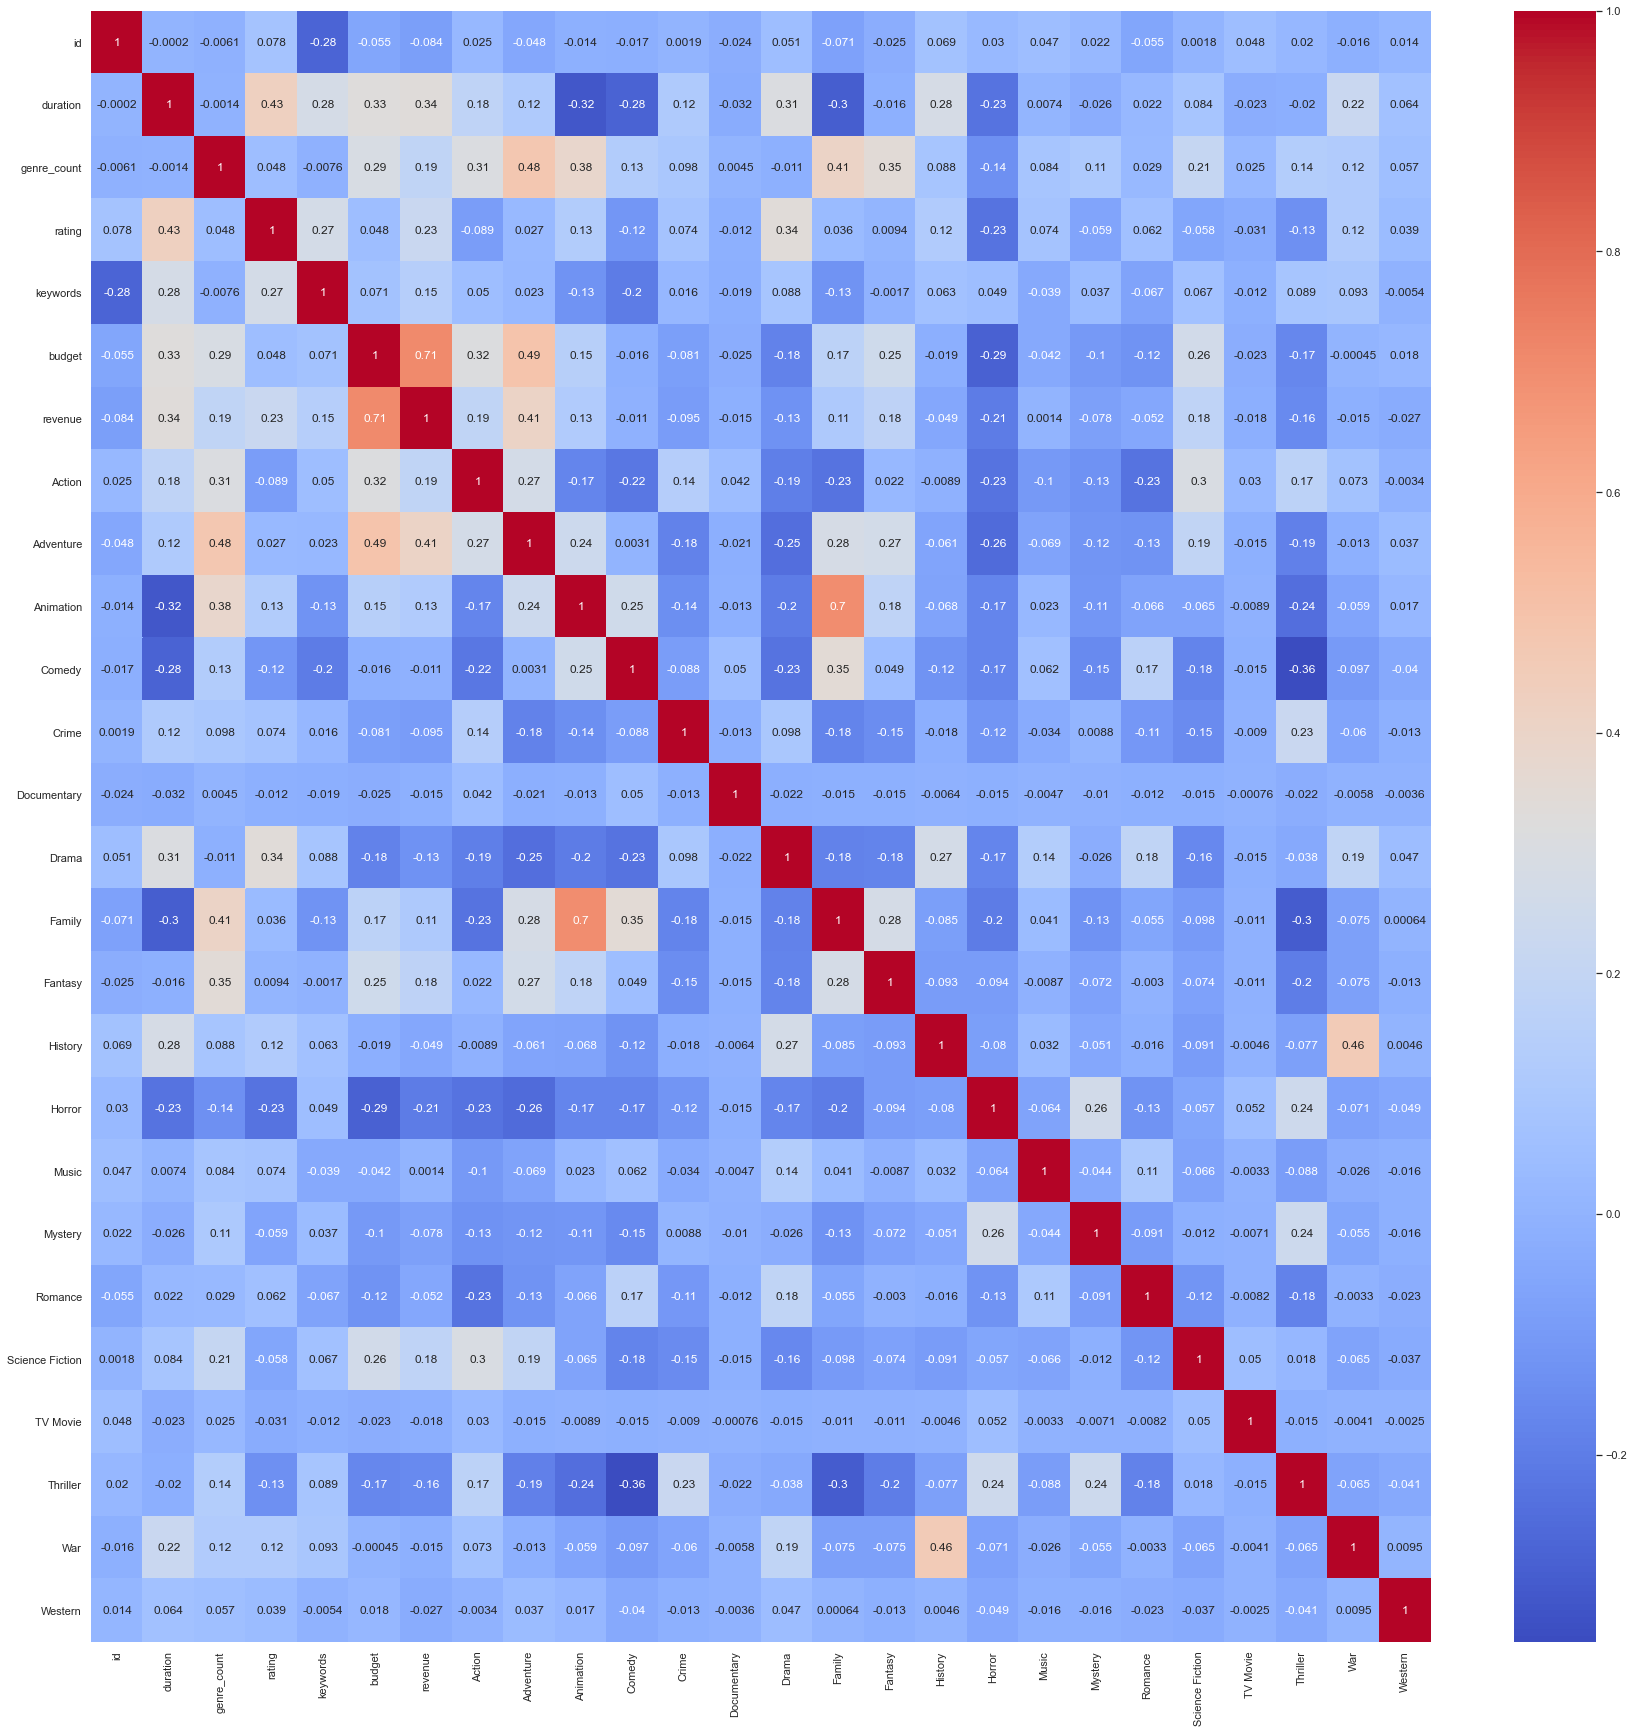

In [12]:
# Ploting the heatmap

sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(movie_df.corr(), cmap="coolwarm", annot=True);

In [234]:
#######################################################################
# Checking skew (skewness = 0 : normally distributed. skewness > 0 :  #
# more weight in the left tail of the distribution.                   #
# skewness < 0 : more weight in the right tail of the distribution.)  #
#######################################################################

movie_df.skew(axis = 0, skipna = True)

id                  1.077538
duration            1.283177
genre_count         0.320208
rating             -0.156906
keywords            0.761691
budget              1.487423
revenue             3.085765
Action              0.499483
Adventure           0.885562
Animation           2.203778
Comedy              0.857799
Crime               2.182823
Documentary        30.561387
Drama               0.857799
Family              1.670874
Fantasy             1.656760
History             4.879099
Horror              1.799797
Music               6.806750
Mystery             2.930483
Romance             2.475903
Science Fiction     1.714121
TV Movie           43.255058
Thriller            0.827735
War                 5.468448
Western             9.065821
dtype: float64

In [236]:
# Getting rid of skewness

for i in ['duration', 'genre_count', 'rating',
       'keywords', 'budget', 'revenue', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']:
    movie_df[i] = movie_df[i].apply(lambda x: np.sqrt(x))
movie_df.skew()

id                  1.077538
duration            0.907056
genre_count        -0.255661
rating             -0.369407
keywords           -0.309713
budget              0.568746
revenue             1.012469
Action              0.499483
Adventure           0.885562
Animation           2.203778
Comedy              0.857799
Crime               2.182823
Documentary        30.561387
Drama               0.857799
Family              1.670874
Fantasy             1.656760
History             4.879099
Horror              1.799797
Music               6.806750
Mystery             2.930483
Romance             2.475903
Science Fiction     1.714121
TV Movie           43.255058
Thriller            0.827735
War                 5.468448
Western             9.065821
dtype: float64

In [237]:
movie_df.columns

Index(['title', 'id', 'release_date', 'duration', 'genre_count', 'rating',
       'keywords', 'language', 'budget', 'revenue', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [238]:
#splitting our data 60%,20%,20%
#x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=0)

X, X_test, y, y_test = train_test_split(movie_df[[ 'duration', 'genre_count', 'rating',
       'keywords', 'budget', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']], 
                                        movie_df['revenue'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [239]:
len(X_train),len(y_train)

(1122, 1122)

In [240]:
# train our data
# Fit a simple linear regression on training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.6537303724023302

In [241]:
# evaluate our model
# Score on validation set
from sklearn.metrics import r2_score
lr.score(X_val,y_val)

0.5479040408564098

In [242]:
#trying with OLS
import statsmodels.api as sm
X= sm.add_constant(X)
# Create your feature matrix (X) and target vector (y)
model_stats = sm.OLS(y, X.astype(float))
# Fit your model to your training set
fit = model_stats.fit()
# Print summary statistics of the model's performance
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     106.9
Date:                Sun, 24 Oct 2021   Prob (F-statistic):          1.91e-301
Time:                        11:50:56   Log-Likelihood:                -14757.
No. Observations:                1496   AIC:                         2.956e+04
Df Residuals:                    1471   BIC:                         2.970e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.113e+04   3229.227     -9.640      0.000   -3.75e+04   -2.48e+04
duration          596.0683    189.589      3.144      0.002     224.174     967.962
genre_count       485.5166   3009.972      0.161      0.872   -5418.778    6389.811
rating           3040.3113    303.929     10.003      0.000    2444.130    3636.492
keywords          829.6808    136.185      6.092      0.000     562.543    1096.819
budget              1.4711      0.045     32.479      0.000       1.382       1.560
Action           -461.2325    991.602     -0.465      0.642   -2406.337    1483.872
Adventure        1187.5616    963.971      1.232      0.218    -703.342    3078.466
Animation         352.1731   1049.856      0.335      0.737   -1707.201    2411.547
Comedy            347.6216    943.963      0.368      0.713   -1504.035    2199.278
Crime           -1107.0900   1027.924     -1.077      0.282   -3123.443     909.263
Documentary      2141.2761   4824.164      0.444      0.657   -7321.698    1.16e+04
Drama           -1626.4132    955.898     -1.701      0.089   -3501.481     248.654
Family           -759.9694   1046.922     -0.726      0.468   -2813.589    1293.650
Fantasy          -736.3799    965.030     -0.763      0.446   -2629.362    1156.602
History         -2262.5929   1203.384     -1.880      0.060   -4623.124      97.939
Horror            852.1638   1018.283      0.837      0.403   -1145.278    2849.606
Music            2071.5894   1245.654      1.663      0.097    -371.859    4515.038
Mystery          -105.7552   1044.780     -0.101      0.919   -2155.172    1943.662
Romance           499.2594   1057.963      0.472      0.637   -1576.018    2574.537
Science Fiction -1062.2863    999.323     -1.063      0.288   -3022.537     897.964
TV Movie         -379.3638   4811.085     -0.079      0.937   -9816.682    9057.954
Thriller         -498.2069   1001.474     -0.497      0.619   -2462.676    1466.263
War              -629.5863   1209.451     -0.521      0.603   -3002.018    1742.845
Western         -4468.7890   1470.565     -3.039      0.002   -7353.417   -1584.161
==============================================================================
Omnibus:                      140.427   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.464
Skew:                           0.584   Prob(JB):                     6.93e-65
Kurtosis:                       4.837   Cond. No.                     3.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
#trying with polynomial
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly,y_train)
lm_poly.score(X_train_poly,y_train)

0.7469442014468044

In [49]:
# Score on validation set
lm_poly.score(X_val_poly, y_val)

0.4063998293086134

In [50]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x0 x18',
 'x0 x19',
 'x0 x20',
 'x0 x21',
 'x0 x22',
 'x0 x23',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x1 x16',
 'x1 x17',
 'x1 x18',
 'x1 x19',
 'x1 x20',
 'x1 x21',
 'x1 x22',
 'x1 x23',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x2 x15',
 'x2 x16',
 'x2 x17',
 'x2 x18',
 'x2 x19',
 'x2 x20',
 'x2 x21',
 'x2 x22',
 'x2 x23',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x

In [51]:
lm_poly.coef_

array([-1.38617161e-02, -4.01018099e+03, -1.47193157e+05, -2.19678262e+04,
       -1.51624264e+03,  3.71245280e-01, -1.06964611e+04, -2.75605579e+04,
       -1.24262615e+04,  5.86605996e+03, -1.38037379e+03, -2.72063246e-03,
        5.58990871e+03,  4.17887966e+04,  2.21354747e+04,  2.54649805e+04,
       -6.77285368e+02,  4.40427088e+04,  3.32691339e+04, -5.79134960e+03,
       -2.26517348e+04, -5.02467888e-01, -1.13049594e+04, -3.94614960e+04,
        9.24459842e+03, -3.12191684e+01,  1.36447148e+03,  5.25407025e+02,
       -8.63415787e+01, -2.13913512e-02, -2.61354169e+02,  8.48567382e+02,
       -1.92502633e+03, -8.52358207e+02, -5.07566284e+02, -2.00096946e-02,
       -1.60330543e+03, -2.64999417e+02,  4.48252474e+02, -4.00628968e+02,
        1.98819860e+02, -6.72855614e+02, -2.42637322e+03,  2.19749301e+03,
       -2.18662298e+02, -4.76733916e+00, -3.98419806e+02, -3.37882929e+02,
        6.19011016e+02,  5.54506774e+04,  1.31223783e+04, -2.13236943e+03,
       -3.32987062e-01,  

In [52]:
# Trying with Lasso to get a better result
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

In [53]:
# Don't forget to standard scale your data for regularized regression
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7252777.17918396, tolerance: 5866523.436725876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10886515.022979736, tolerance: 5866523.436725876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11679278.4886055, tolerance: 5866523.436725876
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: Con

0.6723080495415446

In [54]:
# Score on validation set
lasso.score(X_val_poly_scaled, y_val)

0.5626758788072582

In [55]:
list(zip(poly.get_feature_names(['duration', 'genre_count', 'rating',
       'keywords', 'budget', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']),lasso.coef_))

[('1', 0.0),
 ('duration', 0.0),
 ('genre_count', -0.0),
 ('rating', 0.0),
 ('keywords', 0.0),
 ('budget', 0.0),
 ('Action', -0.0),
 ('Adventure', 0.0),
 ('Animation', 0.0),
 ('Comedy', 0.0),
 ('Crime', -0.0),
 ('Documentary', 0.0),
 ('Drama', -0.0),
 ('Family', 0.0),
 ('Fantasy', -0.0),
 ('History', -0.0),
 ('Horror', 0.0),
 ('Music', 0.0),
 ('Mystery', 0.0),
 ('Romance', 0.0),
 ('Science Fiction', -0.0),
 ('TV Movie', -0.0),
 ('Thriller', -0.0),
 ('War', -0.0),
 ('Western', -0.0),
 ('duration^2', 0.0),
 ('duration genre_count', 0.0),
 ('duration rating', 562.7815860802874),
 ('duration keywords', 0.0),
 ('duration budget', 209.5469905831206),
 ('duration Action', -0.0),
 ('duration Adventure', 329.82521352534434),
 ('duration Animation', 0.0),
 ('duration Comedy', 0.0),
 ('duration Crime', -0.0),
 ('duration Documentary', 0.0),
 ('duration Drama', -350.5370216711384),
 ('duration Family', 0.0),
 ('duration Fantasy', 0.0),
 ('duration History', -54.83457189672675),
 ('duration Horror'

In [56]:
# Fit a LASSO model on full dataset using scaled, polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

lasso = LassoCV()
lasso.fit(X_poly_scaled,y)

# Apply the same polynomial and scaling transformations to test set, then score
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)

lasso.score(X_test_poly_scaled, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10270118.283714294, tolerance: 7084734.345264742
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17700411.7734375, tolerance: 7084734.345264742
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11141438.400558472, tolerance: 7084734.345264742
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: C

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25091546.514369965, tolerance: 7209470.0107689835
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23898061.871047974, tolerance: 7209470.0107689835
  model = cd_fast.enet_coordinate_descent_gram(


0.6015802288845665

In [57]:
# Splitting the X_train data into 5 Folds for cross validation

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [58]:
lm = LinearRegression()

scores = cross_val_score(lm, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lm.fit(X_train, y_train)

[0.67226784 0.57595752 0.62744014 0.62209926 0.65306729]
Linear Reg Mean Score:  0.6301664119916219


LinearRegression()

Text(0.5, 0, 'Actual Revenue')

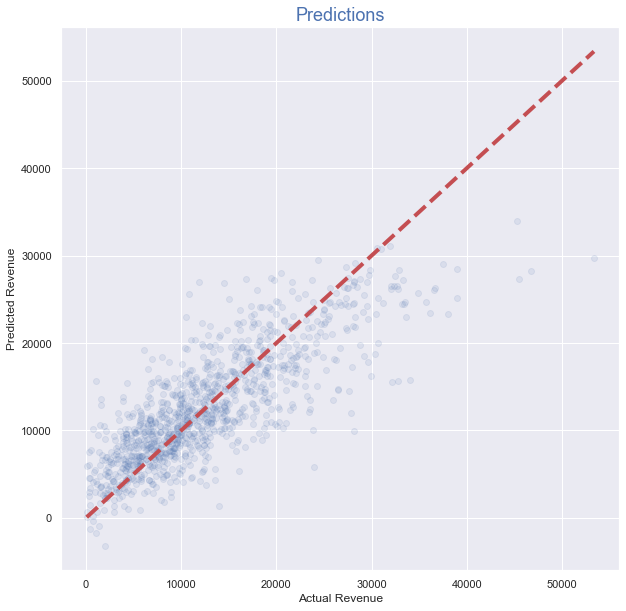

In [96]:
# Fitted vs. Actual
y_train_pred = lm.predict(X_train)
plt.figure(figsize=(10,10))
plt.scatter(y_train, y_train_pred, alpha=0.1)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', c='r', lw=4)
plt.title("Predictions",fontsize=18,c='b')
plt.ylabel('Predicted Revenue')
plt.xlabel('Actual Revenue')

Text(0.5, 0, 'Actual Revenue')

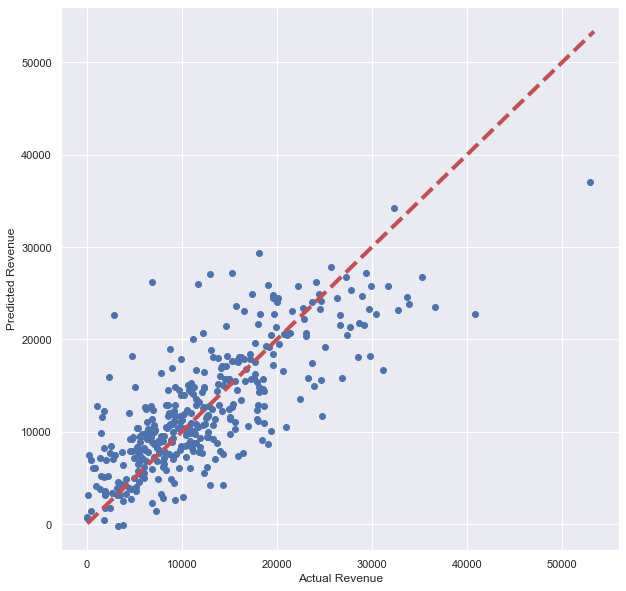

In [87]:
# Fitted vs. Actual
y_test_pred = lm.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', c='r', lw=4)
plt.ylabel('Predicted Revenue')
plt.xlabel('Actual Revenue')

Text(0, 0.5, 'Residuals')

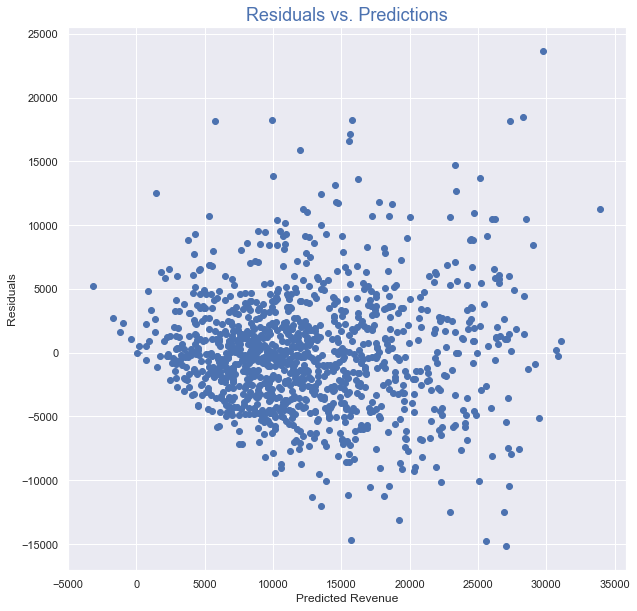

In [94]:
# Plot Residuals vs. predicted

lm_err = y_train - y_train_pred
plt.figure(figsize=(10,10))
plt.scatter(y_train_pred, lm_err)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions",fontsize=18,c='b')
plt.xlabel('Predicted Revenue')
plt.ylabel('Residuals')

Lasso Model:


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9745077585.675804, tolerance: 5503724.475104334
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9842764342.913382, tolerance: 5883348.568035961
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9616219882.13973, tolerance: 5661660.839324617
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9558831275.794987, tolerance: 5644034.341642858
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9435277501.996773, tolerance: 5577747.041727031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9100212427.342014, tolerance: 5503724.475104334
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarnin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8317288698.744715, tolerance: 5883348.568035961
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4599235156.362389, tolerance: 5577747.041727031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7222578152.743433, tolerance: 5883348.568035961
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarnin

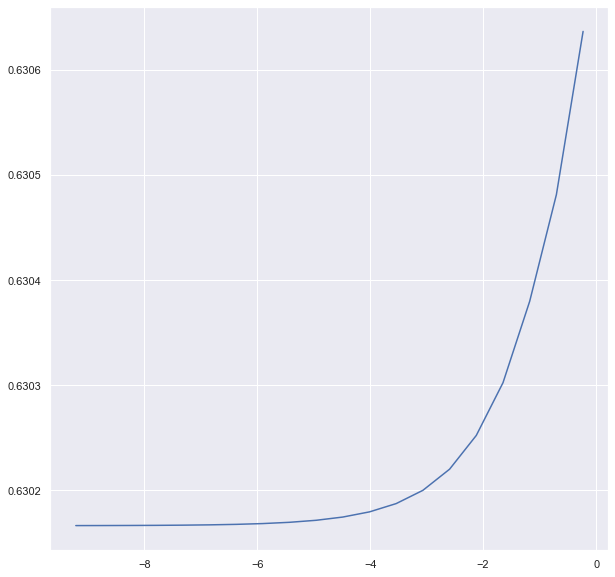

In [66]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.figure(figsize=(10,10))
plt.plot(np.log(df.alpha), df.mean_test_score);

In [67]:
grid_est.best_estimator_

Lasso(alpha=0.7943282347242815)

In [68]:
params['alpha']

array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

Ridge Model:


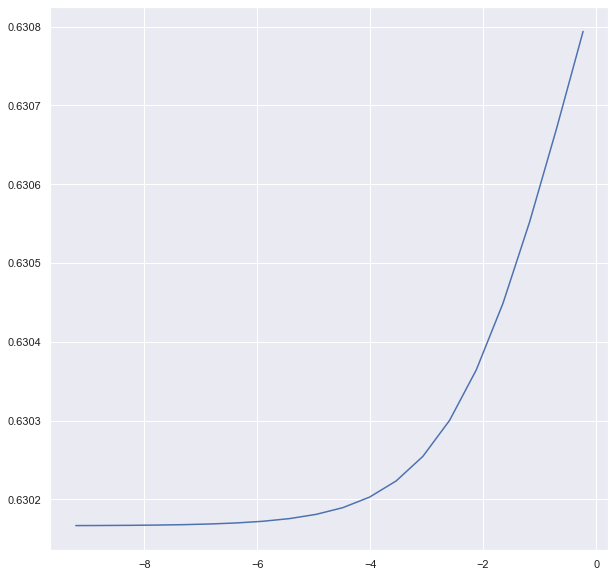

In [69]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Ridge(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.figure(figsize=(10,10))
plt.plot(np.log(df.alpha), df.mean_test_score);

In [70]:
def build_grid_search_est(model, X, y, cv=5, **params):

    grid_est = GridSearchCV(model, param_grid=params, cv=cv, 
                            return_train_score=False)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.cv_results_)
    for param in params:
        df[param] = df.params.apply(lambda val: val[param])
        plt.plot(np.log(df.alpha), df.mean_test_score);
        plt.semilogx(df.alpha, df.mean_test_score)
    return grid_est

Lasso Grid Search


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9745077585.675804, tolerance: 5503724.475104334
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9842764342.913382, tolerance: 5883348.568035961
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9616219882.13973, tolerance: 5661660.839324617
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9609131995.509695, tolerance: 5577747.041727031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9573466072.131975, tolerance: 5503724.475104334
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9822468307.633347, tolerance: 5883348.568035961
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarnin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9465036136.68575, tolerance: 5644034.341642858
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9135220933.940819, tolerance: 5577747.041727031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8650414039.480652, tolerance: 5503724.475104334
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5711321640.803446, tolerance: 5661660.839324617
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8881960682.052807, tolerance: 5644034.341642858
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7543550974.3913555, tolerance: 5577747.041727031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarni

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43649576.164073944, tolerance: 5644034.341642858
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1582752358.3119488, tolerance: 5577747.041727031
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3073237916.2945957, tolerance: 5883348.568035961
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWar

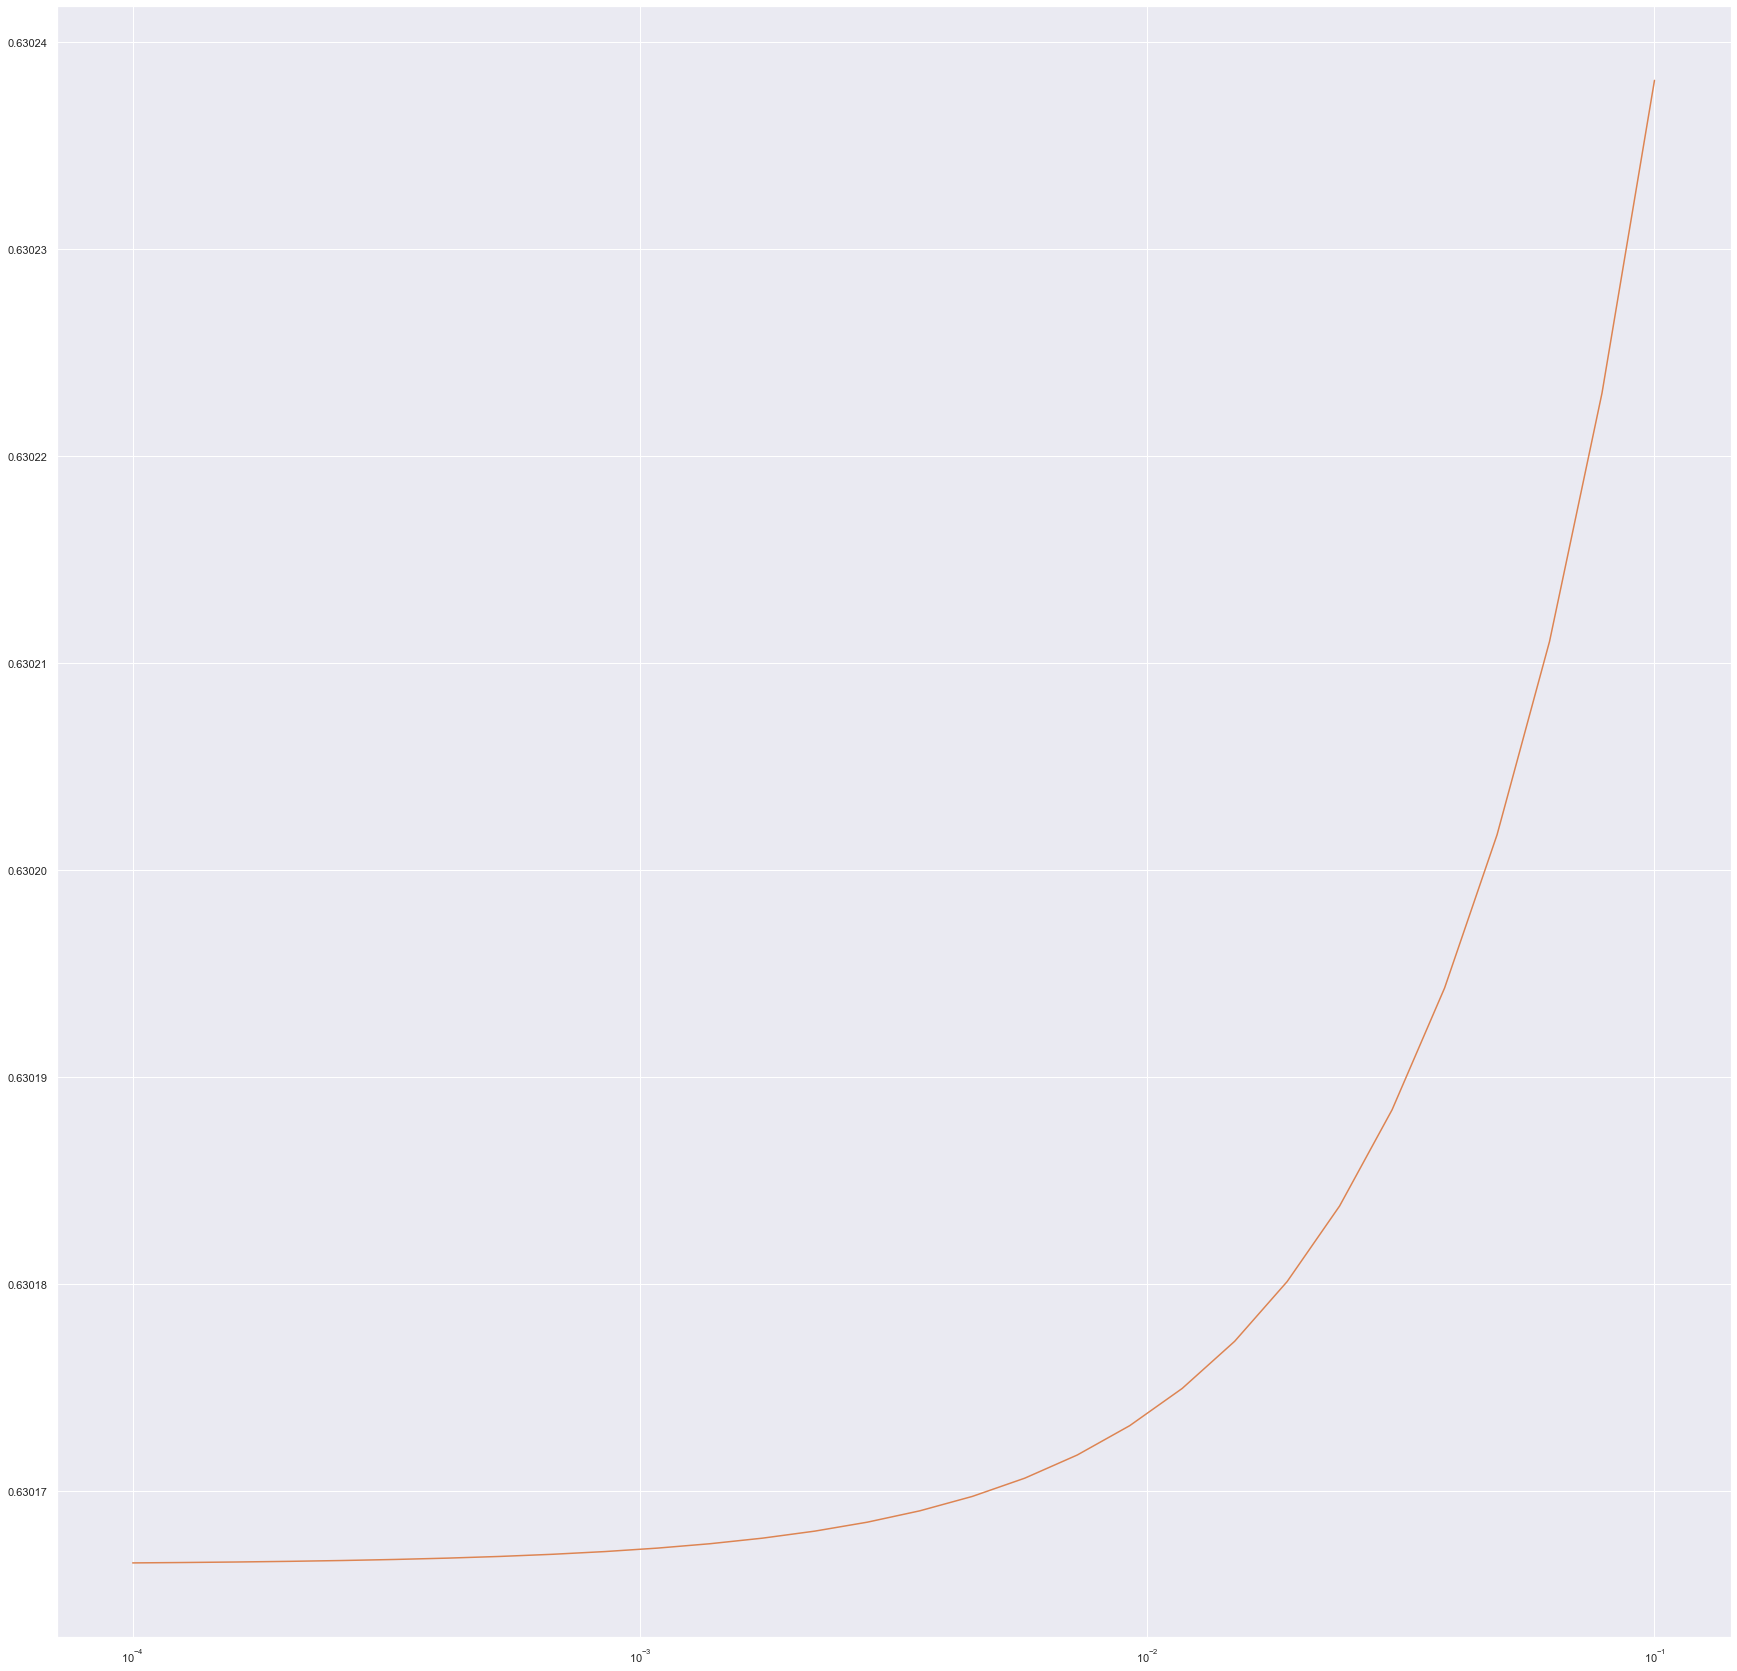

<Figure size 720x720 with 0 Axes>

In [71]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 30))
plt.figure(figsize=(10,10));

Ridge Grid Search


<ipython-input-70-55bdfae8de6a>:10: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogx(df.alpha, df.mean_test_score)


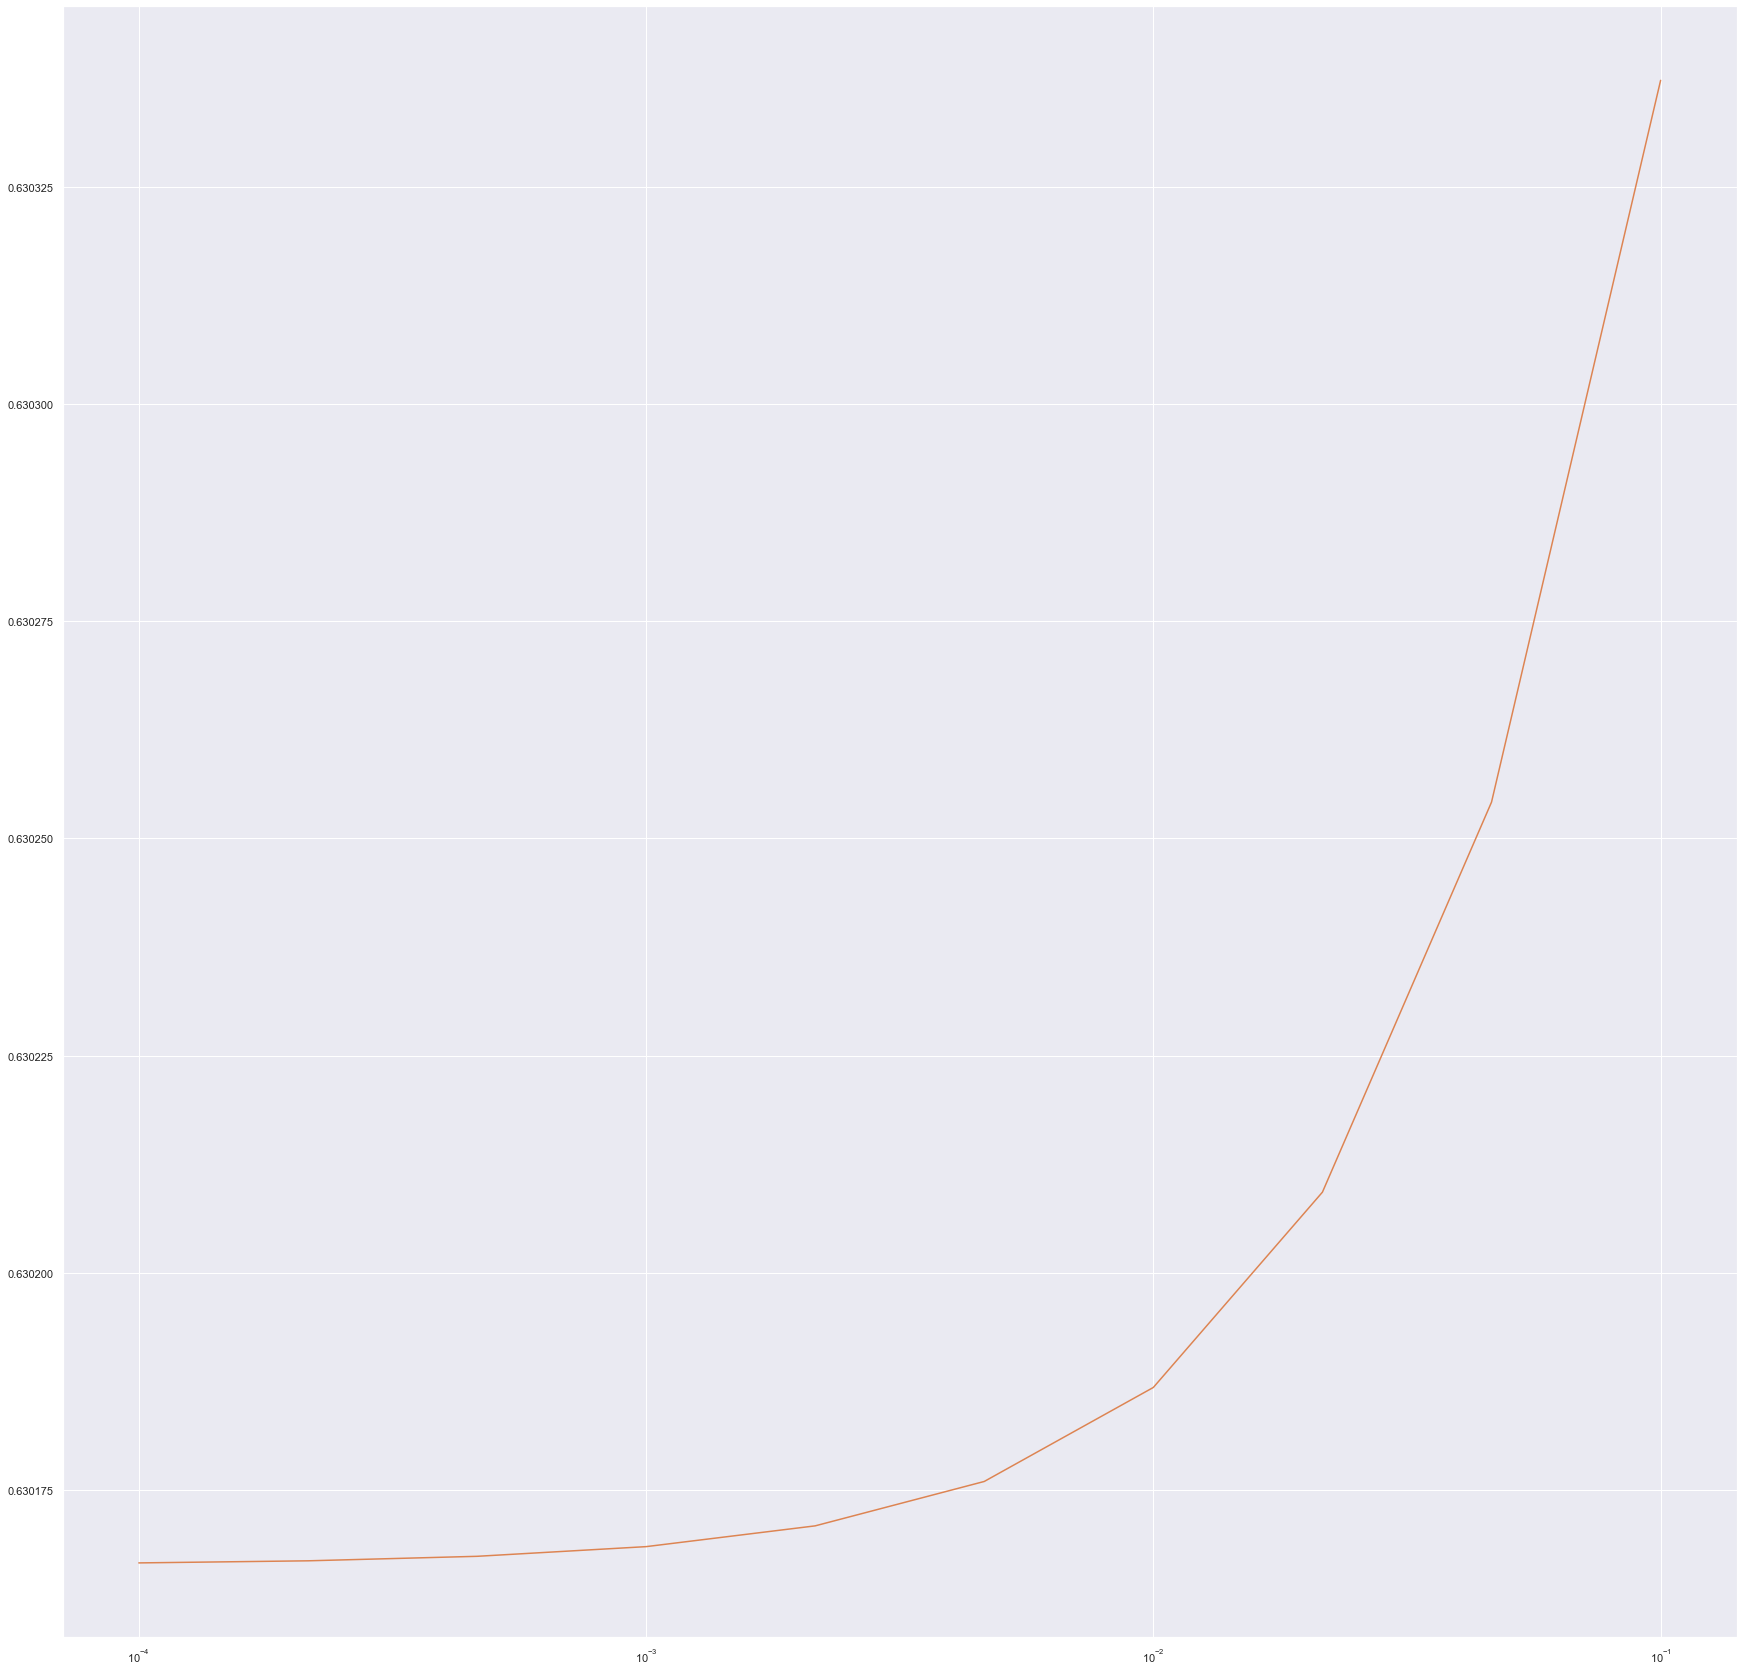

In [72]:
print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, -1, 10))

Elastic Net Grid Search


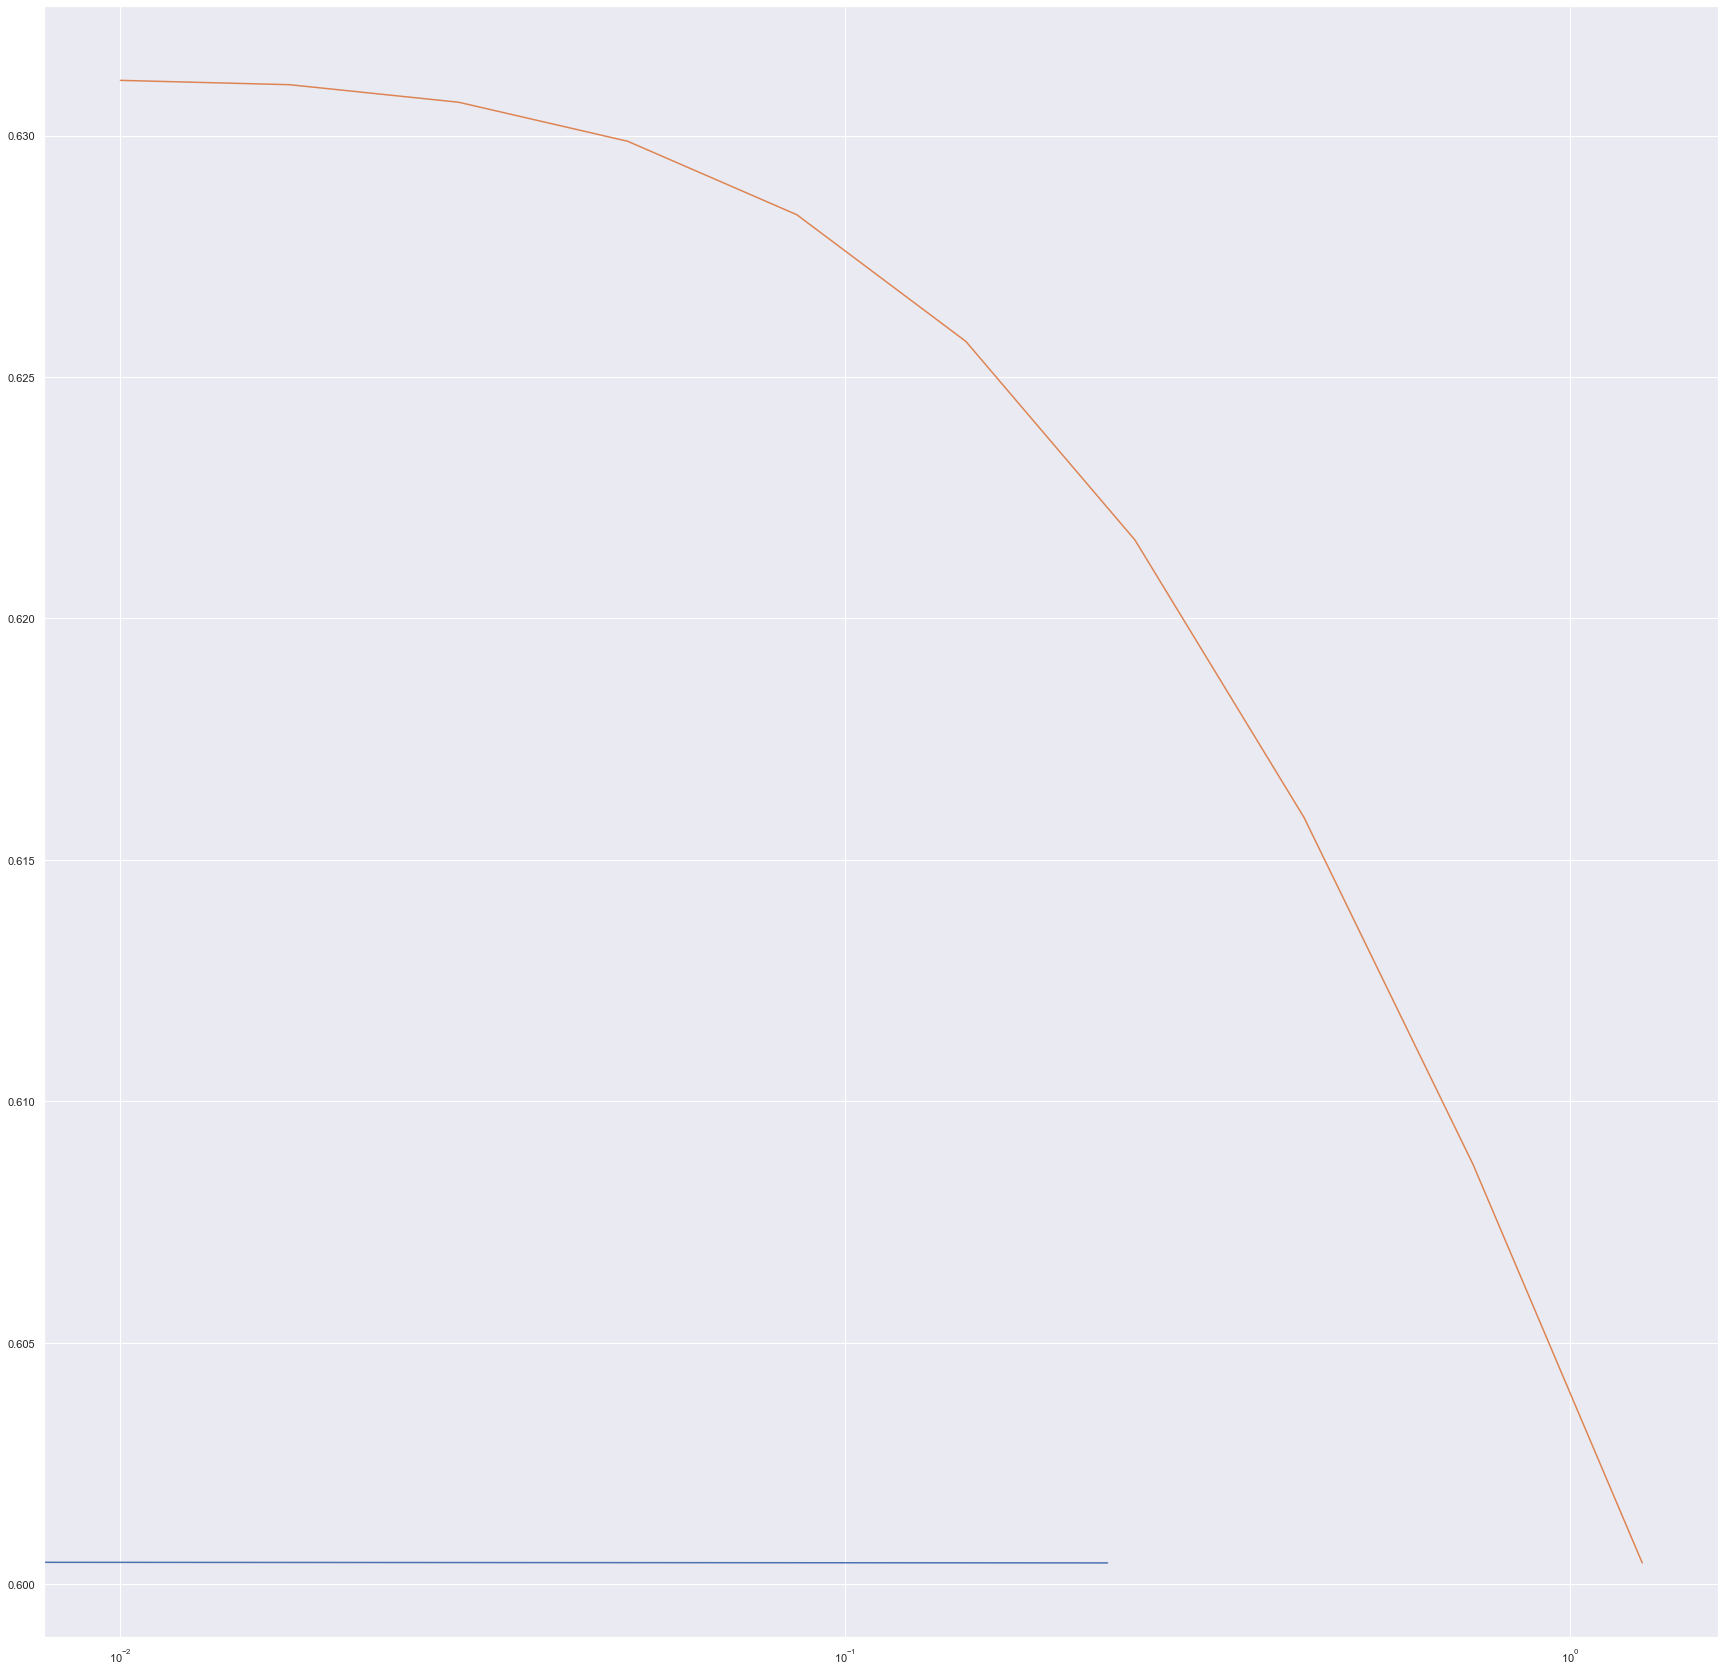

In [73]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                             alpha=np.logspace(-2, 0.1, 10))

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lm.predict(X_test)
print("Linear Regression:", r2_score(y_test, y_pred))

y_pred = lasso_grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

y_pred = ridge_grid_est.predict(X_test)
print("Ridge Regression:", r2_score(y_test, y_pred))

y_pred = elastic_net_grid_est.predict(X_test)
print("ElasticNet Regression:", r2_score(y_test, y_pred))

Linear Regression: 0.5988844410897685
Lasso Regression: 0.598967662236924
Ridge Regression: 0.5990096829891522
ElasticNet Regression: 0.5999416643226203


In [75]:
pd.DataFrame(list(zip(range(10), lasso_grid_est.best_estimator_.coef_)))

,0,1
0,0,618.792496
1,1,1774.826422
2,2,3244.129167
3,3,717.934015
4,4,1.524990
5,5,-1112.086019
6,6,1079.666663
7,7,-303.802090
8,8,-245.647707
9,9,-1387.521796


In [76]:
#other models
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()

lm_poly = LinearRegression()
lm_poly.fit(poly.fit_transform(X_train), y_train)
y_pred = lm_poly.predict(poly.transform(X_test))
print("Polynomial Regression:", r2_score(y_test, y_pred))

Polynomial Regression: 0.397048312962348


In [77]:
# Trying with other Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=2000, max_features=3, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest Regression:", r2_score(y_test, y_pred))

gbm = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("Gradient Boosted Regression:", r2_score(y_test, y_pred))

Random Forest Regression: 0.5002491375368825
Gradient Boosted Regression: 0.5726285418672263


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


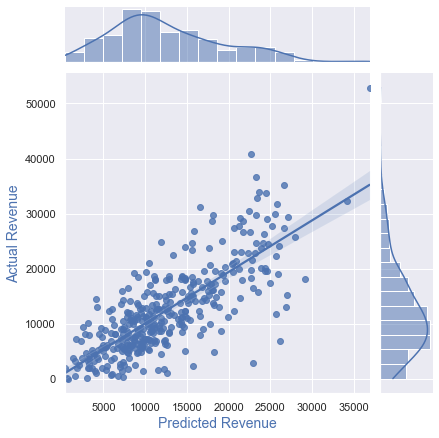

In [88]:
p=sns.jointplot(y_pred, y_test, kind='reg')
p.set_axis_labels('Predicted Revenue','Actual Revenue',fontsize=14,c='b')



### plt.scatter(y_pred, y_test)
plt.figure(figsize=(10,10));

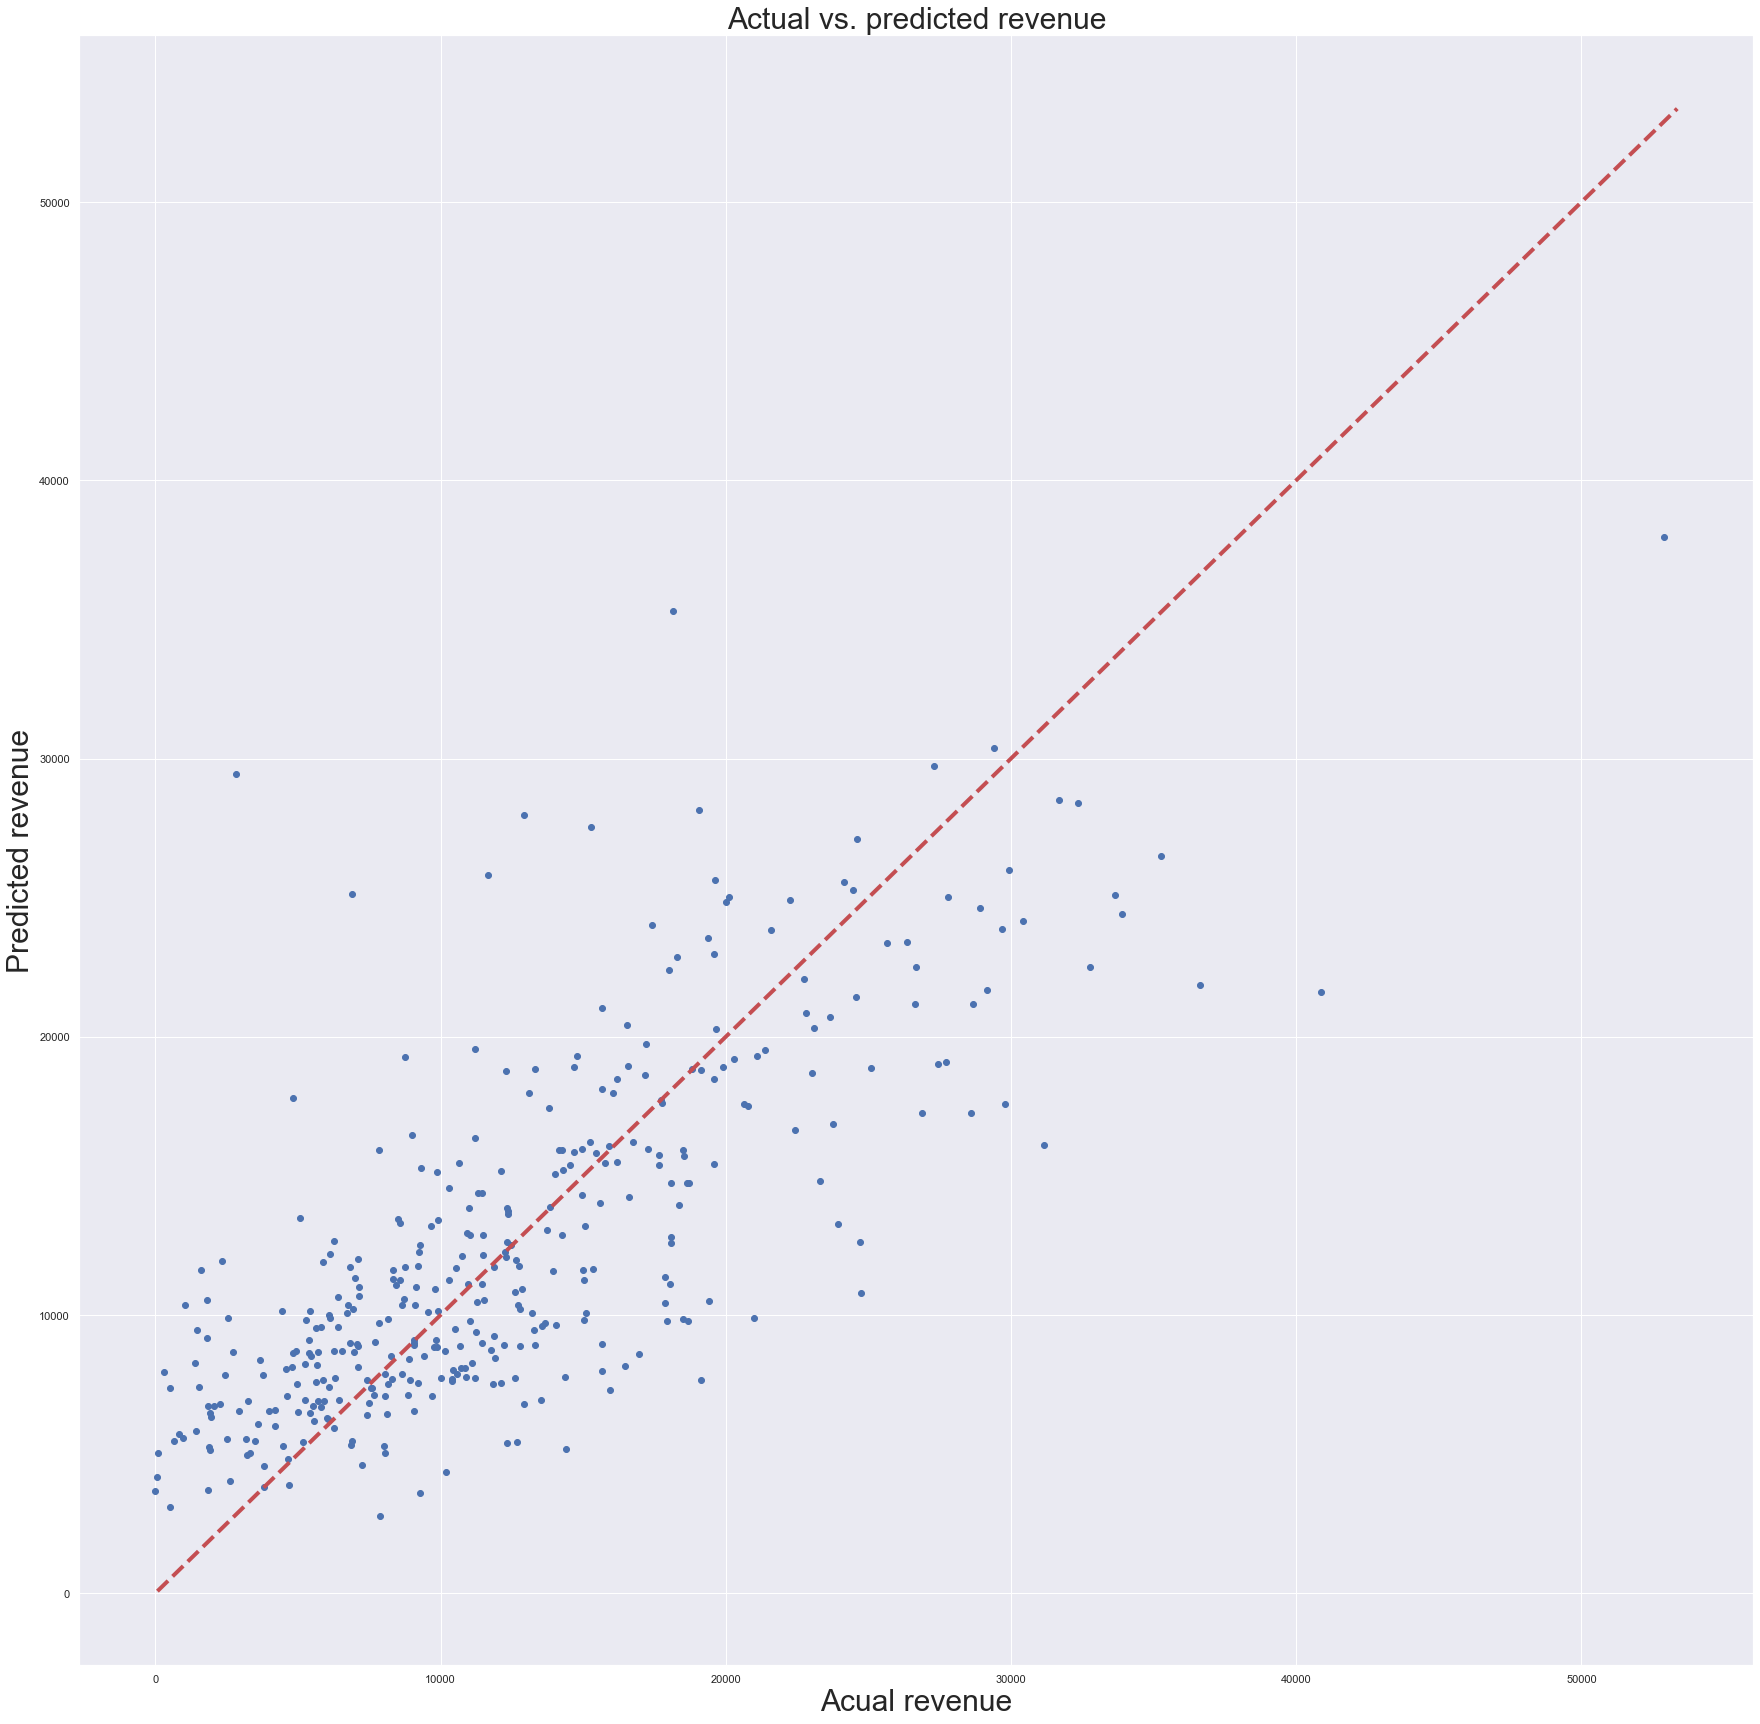

<Figure size 720x720 with 0 Axes>

In [80]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], '--', c='r', lw=4)
ax.set_xlabel('Acual revenue', size =30)
ax.set_ylabel('Predicted revenue', size=30)
plt.title('Actual vs. predicted revenue', size=30)
plt.figure(figsize=(10,10))
plt.show();

In [81]:
# Trying to imporve r2

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Recursive Feature Engineering algorithm for selecting the most effective features to the model
# Feature extraction

model = LinearRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 8
Selected Features: [ True  True False False False False  True False False False False  True
 False False  True False False False False False  True  True False  True]
Feature Ranking: [ 1  1  2 14 17 12  1 15 11  4  7  1 13  8  1  5 16 10  6  9  1  1  3  1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.6537303724023302

In [83]:
from sklearn.metrics import r2_score
lr.score(X_val,y_val)

0.5479040408563695

In [84]:
y_pred = lr.predict(X_test)
print("Linear Regression:", r2_score(y_test, y_pred))
y_pred = lasso_grid_est.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

y_pred = ridge_grid_est.predict(X_test)
print("Ridge Regression:", r2_score(y_test, y_pred))

y_pred = elastic_net_grid_est.predict(X_test)
print("ElasticNet Regression:", r2_score(y_test, y_pred))

Linear Regression: 0.5988844410897685
Lasso Regression: 0.598967662236924
Ridge Regression: 0.5990096829891522
ElasticNet Regression: 0.5999416643226203


# Other features engineering we tried to improve r2:


In [755]:
# Trying agin with features selection

# the highest correlated columns with the target term 'revenue'
correlation = movie_df.corr(method='pearson')
highest_columns = correlation.nlargest(10,'revenue').index
highest_columns

Index(['revenue', 'budget', 'Adventure', 'duration', 'rating', 'genre_count',
       'keywords', 'Action', 'Fantasy', 'Science Fiction'],
      dtype='object')

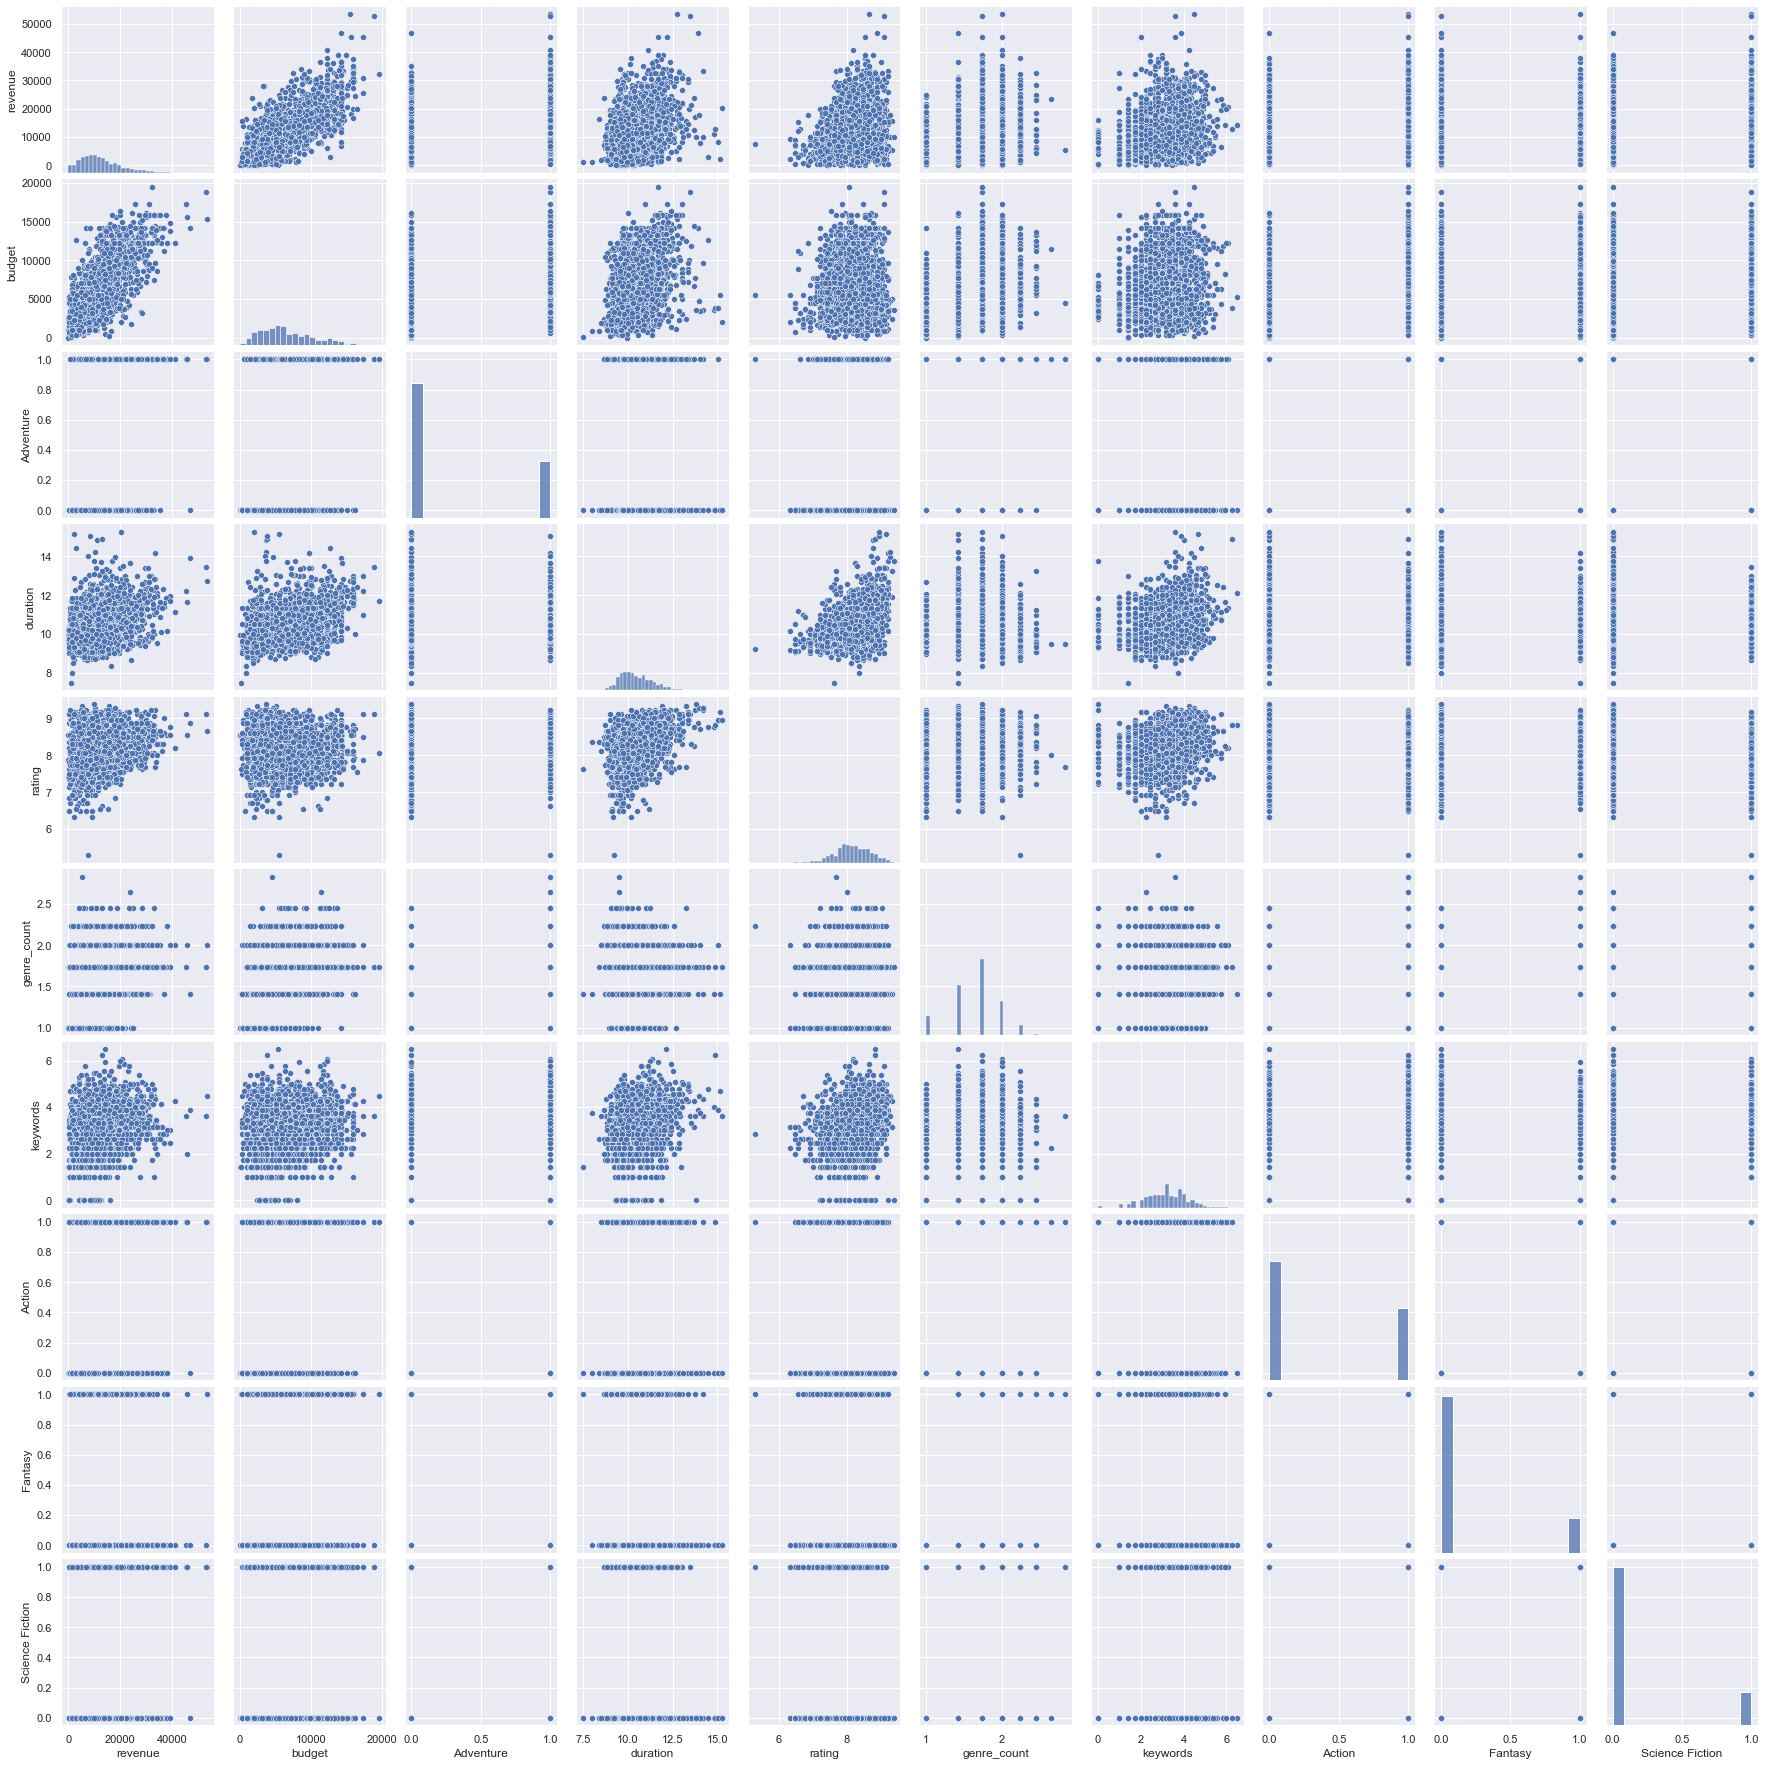

In [725]:
# Pair Plot to the highest correlated columns with the target column 'revenue'

sns.pairplot(movie_df.loc[:,highest_columns])

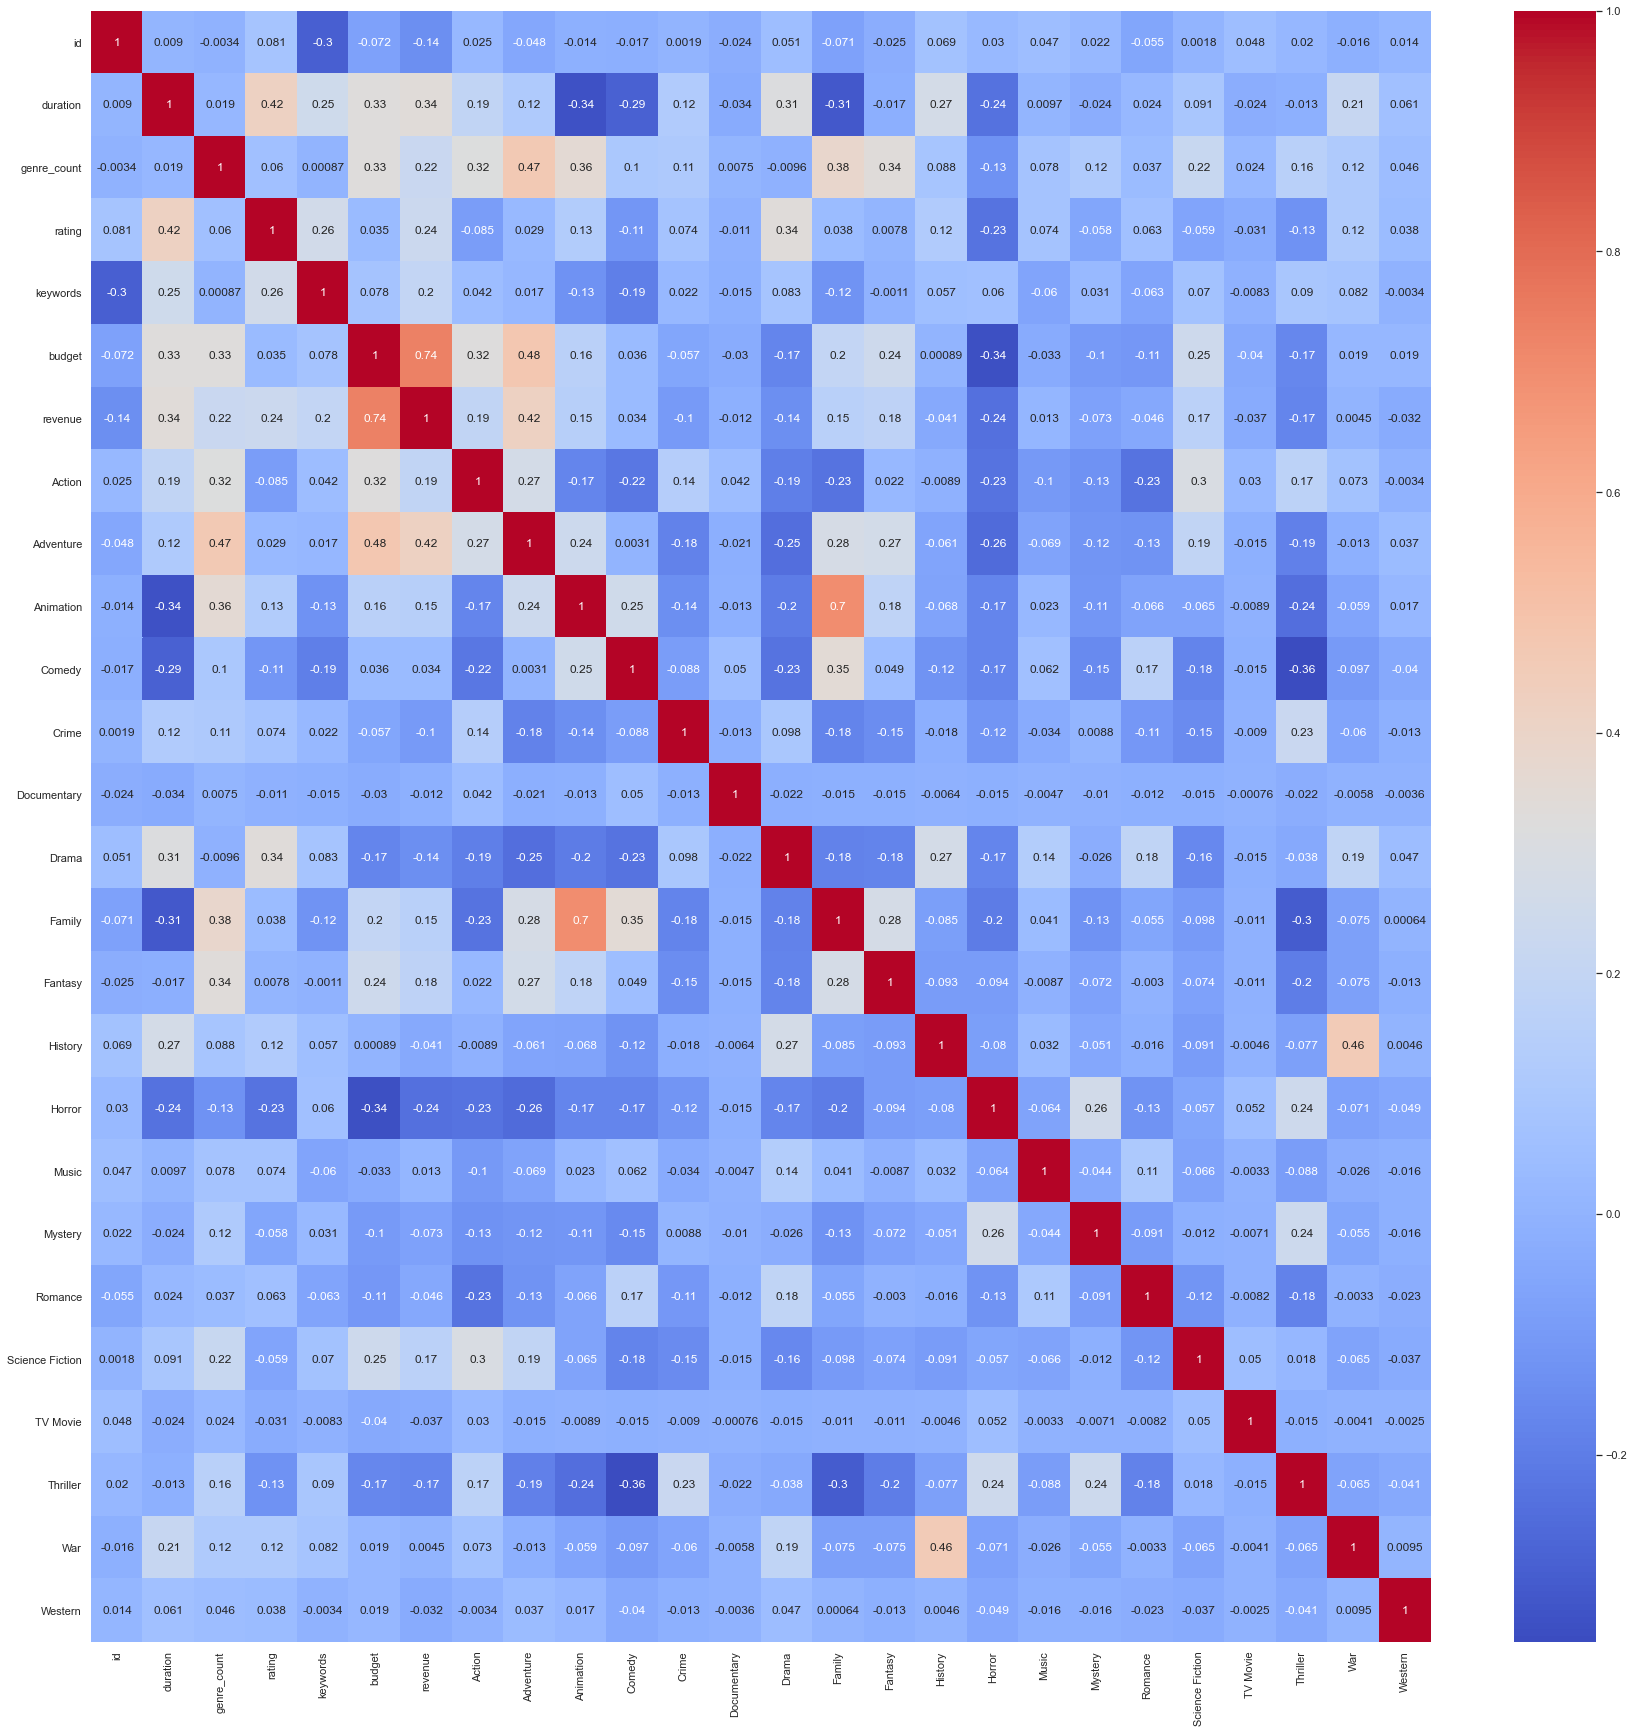

In [726]:
# Ploting the heatmap

sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(movie_df.corr(), cmap="coolwarm", annot=True);

In [756]:
# Simple Linear Regression model between budget and revenue
movie_df_sm = movie_df.loc[:,['budget','revenue']]
X = movie_df_sm['budget'].values.reshape(-1,1)
Y = movie_df_sm['revenue'].values.reshape(-1,1)
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.5450525715836468

In [758]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.6537303724023302

In [730]:
lr.score(X_test,y_test)

0.5988844410897926

In [759]:
# create a new column represents the difference between revenue and budget

movie_df['cost'] = movie_df['revenue'] - movie_df['budget']

In [760]:
# Trying to check if adding new interacting term to the regression model using the highly correlated features
# will improve the model predictability through feature engineering

movie_df['FxA'] = movie_df['Family'] * movie_df['Animation']

In [761]:
movie_df.columns

Index(['title', 'id', 'release_date', 'duration', 'genre_count', 'rating',
       'keywords', 'language', 'budget', 'revenue', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'cost',
       'FxA'],
      dtype='object')

In [762]:
# using statsmodels

X_train = sm.add_constant(X_train)
smodel = sm.OLS(y_train,X_train)
model_results = smodel.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     86.29
Date:                Sat, 23 Oct 2021   Prob (F-statistic):          8.40e-233
Time:                        22:38:04   Log-Likelihood:                -11072.
No. Observations:                1122   AIC:                         2.219e+04
Df Residuals:                    1097   BIC:                         2.232e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.409e+04   3820.110     -8.925      0.000   -4.16e+04   -2.66e+04
duration          618.2520    223.519      2.766      0.006     179.680    1056.824
genre_count      2031.9985   3456.326      0.588      0.557   -4749.758    8813.755
rating           3243.8751    360.034      9.010      0.000    2537.443    3950.307
keywords          717.6528    159.641      4.495      0.000     404.416    1030.889
budget              1.5247      0.052     29.066      0.000       1.422       1.628
Action          -1192.7570   1138.343     -1.048      0.295   -3426.333    1040.819
Adventure        1003.3835   1110.224      0.904      0.366   -1175.019    3181.786
Animation        -381.1964   1216.663     -0.313      0.754   -2768.446    2006.053
Comedy           -322.5438   1086.543     -0.297      0.767   -2454.482    1809.394
Crime           -1468.5507   1181.981     -1.242      0.214   -3787.749     850.648
Documentary      1992.1958   4896.247      0.407      0.684   -7614.871    1.16e+04
Drama           -2189.3188   1099.759     -1.991      0.047   -4347.188     -31.449
Family           -918.3225   1203.930     -0.763      0.446   -3280.588    1443.943
Fantasy         -1324.3160   1106.336     -1.197      0.232   -3495.090     846.458
History         -3209.8192   1360.794     -2.359      0.019   -5879.873    -539.765
Horror            351.0290   1161.641      0.302      0.763   -1928.261    2630.319
Music            2069.0650   1382.750      1.496      0.135    -644.068    4782.198
Mystery          -896.6796   1206.717     -0.743      0.458   -3264.415    1471.056
Romance           -90.9544   1222.915     -0.074      0.941   -2490.472    2308.563
Science Fiction -1370.2164   1143.058     -1.199      0.231   -3613.044     872.611
TV Movie         -405.6922   4884.036     -0.083      0.934   -9988.800    9177.415
Thriller         -854.1234   1152.423     -0.741      0.459   -3115.326    1407.080
War              -707.9191   1392.747     -0.508      0.611   -3440.668    2024.830
Western         -5432.3249   1591.993     -3.412      0.001   -8556.020   -2308.630
==============================================================================
Omnibus:                      112.360   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.887
Skew:                           0.613   Prob(JB):                     1.63e-51
Kurtosis:                       4.870   Cond. No.                     3.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [735]:
#splitting our data 60%,20%,20%
#x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=0)

X, X_test, y, y_test = train_test_split(movie_df[[ 'duration', 'genre_count', 'rating',
       'keywords', 'budget', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',  'cost',
       'FxA']], 
                                        movie_df['revenue'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [763]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.6537303724023302